In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Tensorflow

Check eager execution

In [7]:
tf.executing_eagerly()

True

## MNIST digits simple recognition

### Import data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

### Set model

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [10]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.1898768 ,  0.7636173 , -0.44643664,  0.3351848 ,  0.34215933,
         0.56299865, -0.77776575, -0.05787572, -0.91279906, -0.2161095 ]],
      dtype=float32)

In [11]:
tf.nn.softmax(predictions).numpy()

array([[0.10827066, 0.1921689 , 0.05730116, 0.12520373, 0.12608   ,
        0.15723729, 0.04114044, 0.084511  , 0.03594386, 0.07214283]],
      dtype=float32)

In [14]:
loss_fn = tf.keras.losses.\
    SparseCategoricalCrossentropy(from_logits=True)

In [15]:
loss_fn(y_train[:1], predictions).numpy()

1.8499992

In [16]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

### Train

In [19]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/10
1875/1875 [==============================] - 1s 581us/step - loss: 0.0654 - accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 1s 592us/step - loss: 0.0573 - accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 1s 594us/step - loss: 0.0529 - accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 1s 584us/step - loss: 0.0473 - accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 1s 600us/step - loss: 0.0443 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 1s 575us/step - loss: 0.0408 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 1s 570us/step - loss: 0.0352 - accuracy: 0.9877
Epoch 8/10
1875/1875 [==============================] - 1s 570us/step - loss: 0.0361 - accuracy: 0.9877
Epoch 9/10
1875/1875 [==============================] - 1s 573us/step - loss: 0.0350 - accuracy: 0.9880
Epoch 10/10
1875/1875 [==============================] - 1s 587u

### Test

In [20]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0675 - accuracy: 0.9812


[0.06750329583883286, 0.9811999797821045]

In [21]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [22]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.6817426e-11, 5.1462374e-14, 4.6654618e-09, 5.7851062e-06,
        1.8771259e-18, 4.1116781e-08, 4.2589995e-21, 9.9999404e-01,
        4.5457447e-09, 1.1752018e-07],
       [3.0558429e-12, 2.0616028e-08, 1.0000000e+00, 4.6013982e-10,
        2.0430446e-19, 3.6738655e-12, 8.0474663e-12, 5.6255607e-17,
        3.2832315e-10, 1.8961006e-18],
       [1.8869845e-10, 9.9990094e-01, 4.4463941e-05, 1.5103083e-07,
        3.9908965e-08, 3.7799825e-08, 6.0511337e-07, 3.7862119e-05,
        1.5962583e-05, 7.7094647e-10],
       [9.9999177e-01, 5.4822056e-14, 1.3858235e-07, 7.9030575e-13,
        1.5917815e-09, 4.0562179e-11, 8.9830571e-08, 7.8116300e-06,
        1.6705374e-14, 7.3399427e-08],
       [7.4482781e-10, 1.3080777e-11, 2.3647281e-10, 2.1322900e-11,
        9.9989319e-01, 6.1633990e-11, 1.1408664e-08, 1.8985956e-07,
        1.8159987e-08, 1.0656441e-04]], dtype=float32)>

## MNIST model improvement

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [24]:
model.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])

### Train

In [25]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4483 - accuracy: 0.8709
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3733 - accuracy: 0.8954
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3585 - accuracy: 0.8984
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3560 - accuracy: 0.9001
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3527 - accuracy: 0.8989


In [26]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3477 - accuracy: 0.9018
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3455 - accuracy: 0.9031
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3464 - accuracy: 0.9032
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3459 - accuracy: 0.9033
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3441 - accuracy: 0.9029


In [27]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.3147 - accuracy: 0.9120


[0.314681738615036, 0.9120000004768372]

### Add probabilities

In [57]:
p_model = tf.keras.Sequential([model, 
                               tf.keras.layers.Softmax()])

In [58]:
predictions = p_model.predict(x_test)
predictions[0]

array([3.1052747e-05, 2.5643519e-08, 2.8226752e-05, 3.8882237e-02,
       3.0889360e-08, 1.1064956e-05, 3.3014436e-10, 9.6007627e-01,
       2.9492736e-05, 9.4162294e-04], dtype=float32)

In [59]:
np.argmax(predictions[0])

7

In [61]:
y_test[0]

7

### Visualize

In [53]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                  100*np.max(predictions_array),
                                  true_label),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

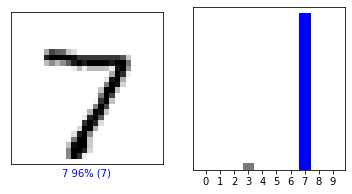

In [63]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()

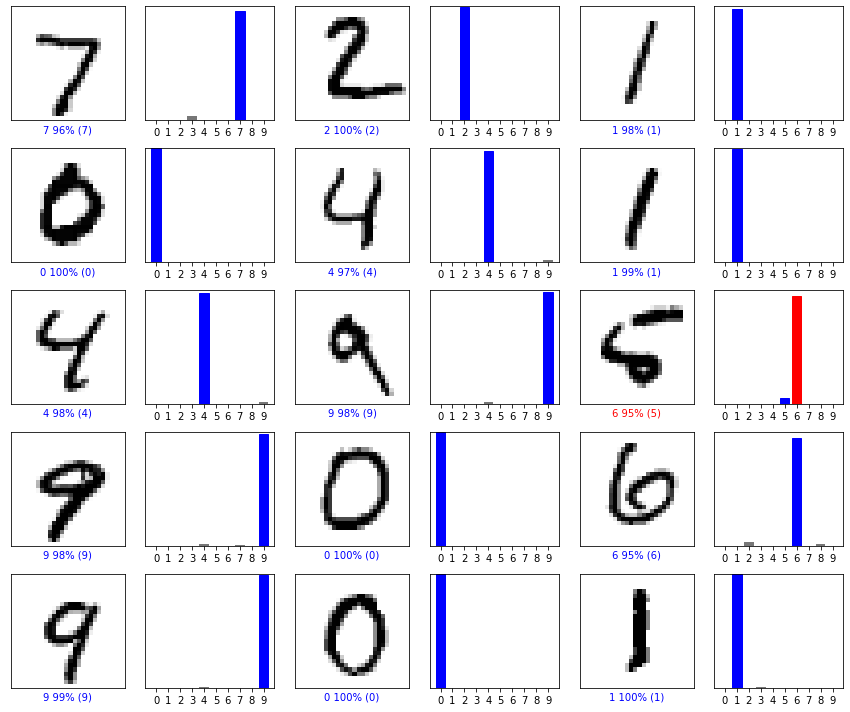

In [69]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()